We work at Delhi Delights! which is a food delivery company in Delhi. It offers a premium membership called ‘Delighted Members’, with which there is no delivery cost for your order. Lately, the number of purchases of this premium membership has been going down. Now, based on past data, Delhi Delights! wants to predict which of the customers will buy the 'Delighted Members' membership and which ones will not. 


![image1](https://miro.medium.com/max/875/0*8CoIJ0viQsn4UH4G.jpg)

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv(r"/kaggle/input/delhi-delights-data/DelhiDelightsData.csv")

In [3]:
df.columns

Index(['Average Delivery Rating (a1)', 'Average Orders per month (a2)',
       '"Delighted Members" Purchase'],
      dtype='object')

In [4]:
df.head(len(df))

,Average Delivery Rating (a1),Average Orders per month (a2),"""Delighted Members"" Purchase"
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No
3,3.5,11,No
4,3.5,11,No
5,4.5,11,Yes
6,1.5,13,Yes
7,2.5,13,No
8,2.5,13,No
9,3.5,13,No


In [5]:
df.shape

(30, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Average Delivery Rating (a1)   30 non-null     float64
 1   Average Orders per month (a2)  30 non-null     int64  
 2   "Delighted Members" Purchase   30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [7]:
df.describe()

,Average Delivery Rating (a1),Average Orders per month (a2)
count,30.000000,30.000000
mean,3.066667,21.000000
std,1.040004,10.763924
min,1.500000,11.000000
25%,2.500000,13.000000
50%,3.000000,15.000000
75%,3.500000,27.000000
max,4.500000,39.000000


# EDA 

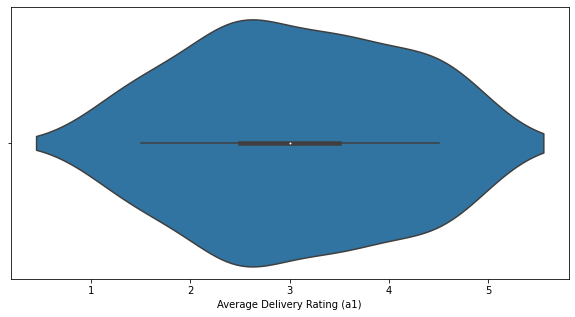

In [8]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Average Delivery Rating (a1)'])
plt.show()

No Outliers exists for this field

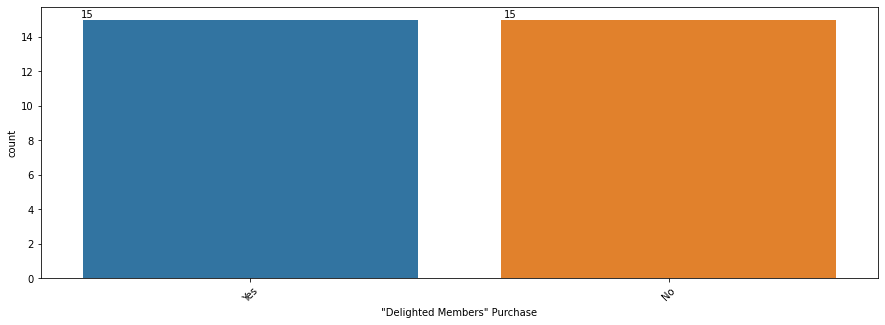

In [9]:
plt.figure(figsize = (15,5))
ax= sns.countplot(df['"Delighted Members" Purchase'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.show()

**Balanced Dataset** over "Delighted Members" Purchase' field

In [10]:
df['"Delighted Members" Purchase'].value_counts(ascending=False) * 100 / len(df)

Yes    50.0
No     50.0
Name: "Delighted Members" Purchase, dtype: float64

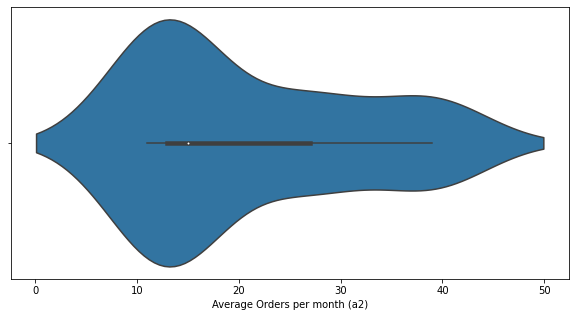

In [11]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(df['Average Orders per month (a2)'])
plt.show()

No Outliers exists for this field

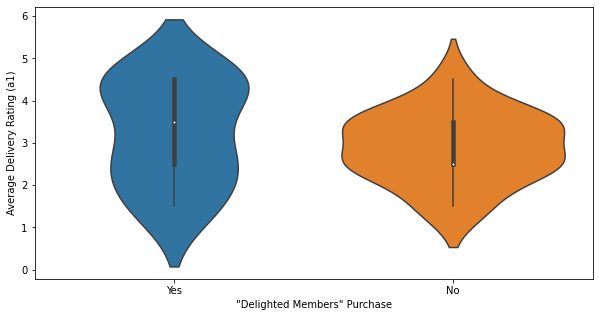

In [12]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Average Delivery Rating (a1)', x = '"Delighted Members" Purchase', data = df)
plt.show()

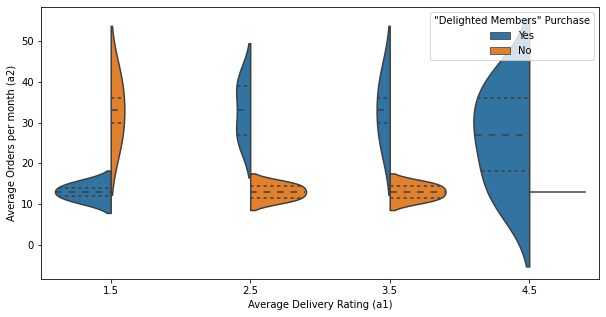

In [13]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Average Orders per month (a2)',x='Average Delivery Rating (a1)', 
               hue = '"Delighted Members" Purchase', split=True,data = df,inner="quartile")
plt.show()

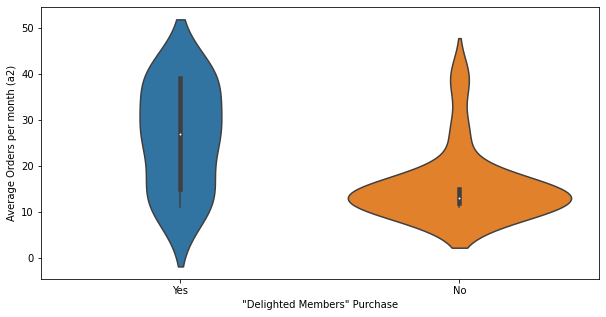

In [14]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Average Orders per month (a2)', x = '"Delighted Members" Purchase', data = df)
plt.show()

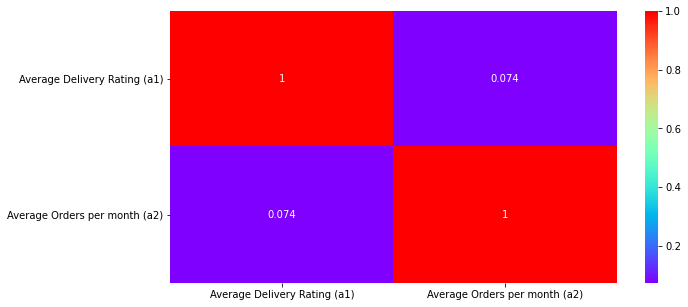

In [15]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

In [16]:
# Putting feature variable to X
X = df.drop('"Delighted Members" Purchase',axis=1)

# Putting response variable to y
y = df['"Delighted Members" Purchase']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)
X_train.shape, X_test.shape

((21, 2), (9, 2))

In [19]:
from sklearn.tree import DecisionTreeClassifier

### Decision Tree over whole dataset

In [20]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

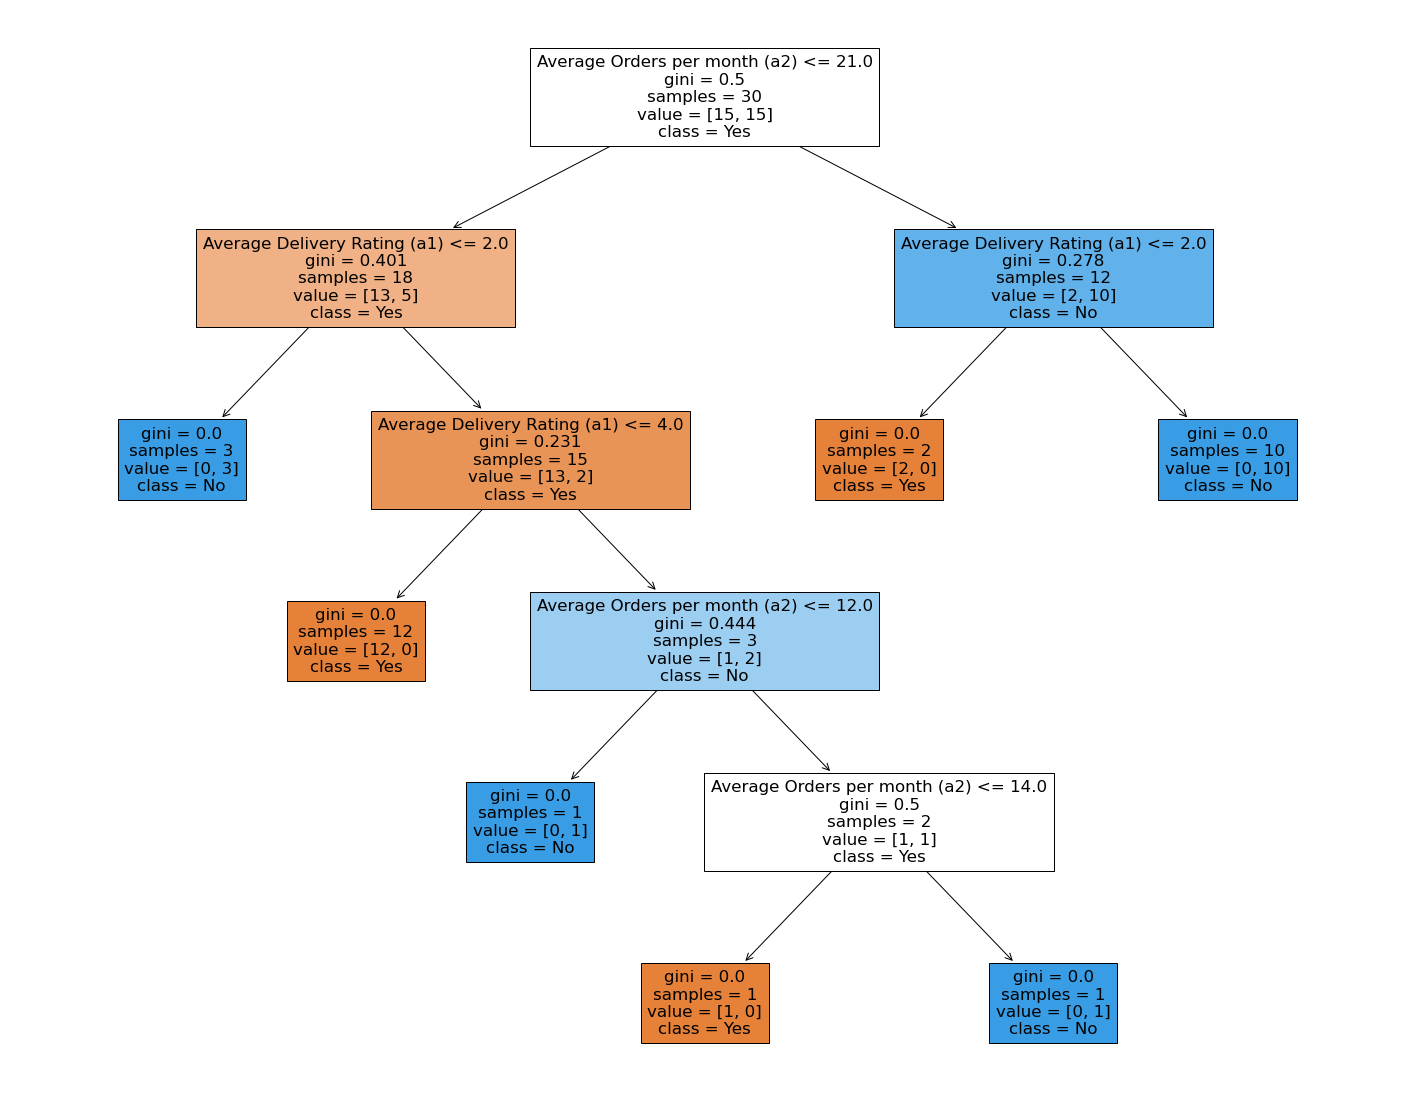

In [21]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Yes', "No"],
                   filled=True)

### Decision Tree over test dataset

In [22]:
dt = DecisionTreeClassifier(random_state=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

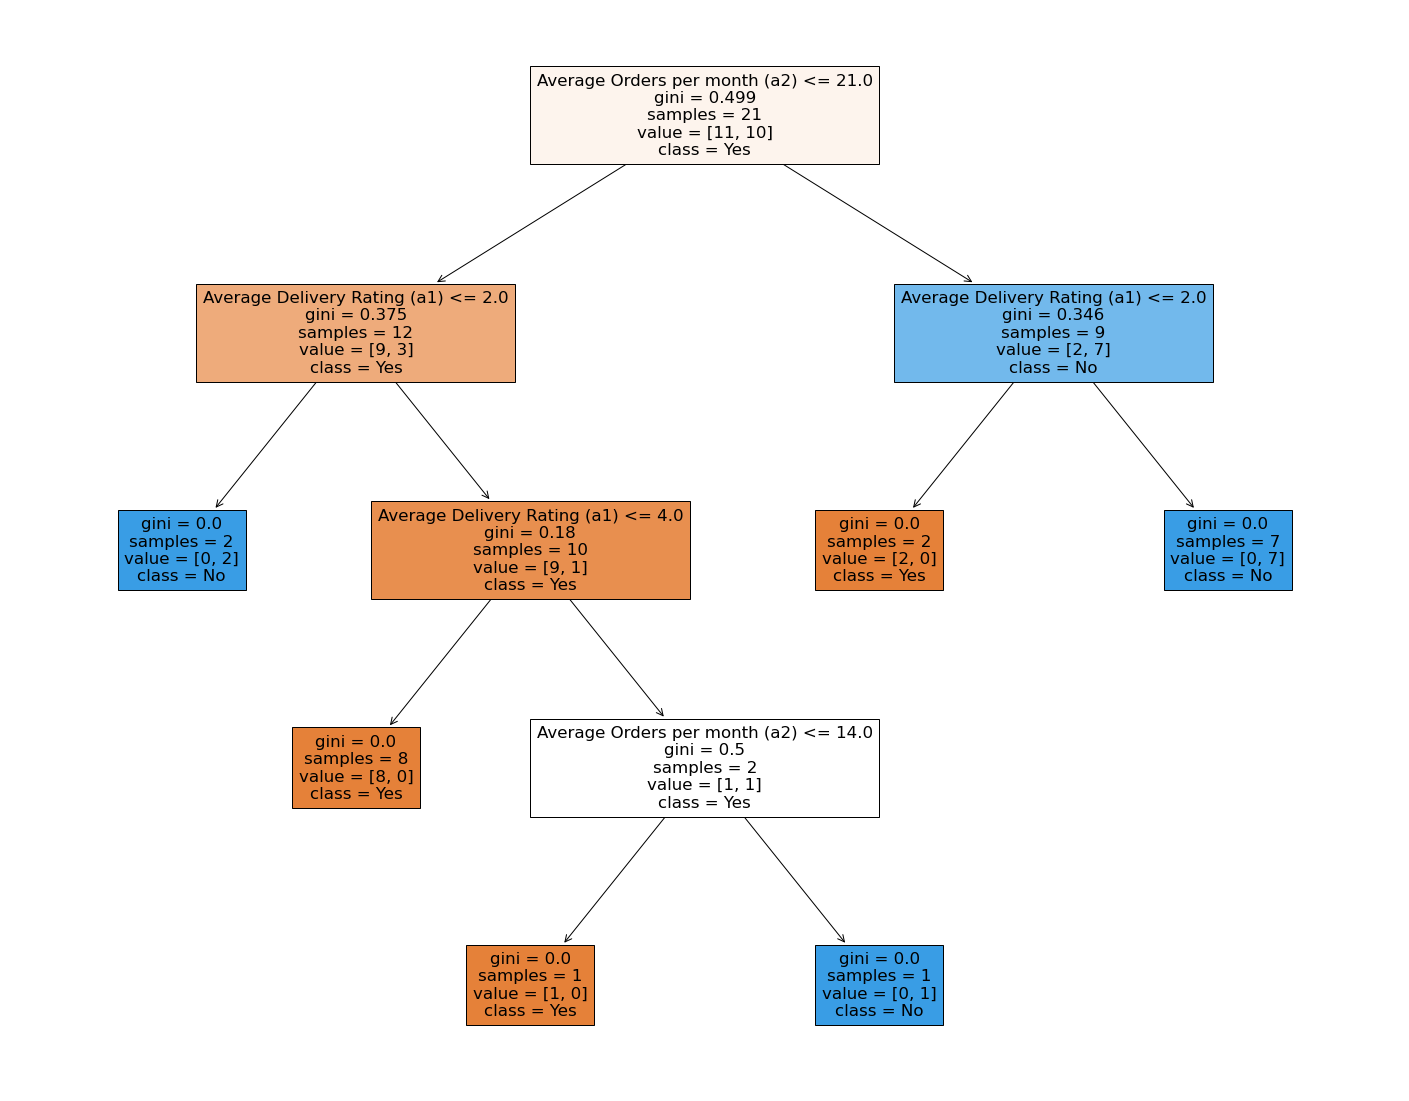

In [23]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Yes', "No"],
                   filled=True)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", round(accuracy_score(y_train, dt_classifier.predict(X_train)),2))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", round(accuracy_score(y_test, dt_classifier.predict(X_test)),2))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [26]:
evaluate_model(dt)

Train Accuracy : 1.0
Train Confusion Matrix:
[[11  0]
 [ 0 10]]
--------------------------------------------------
Test Accuracy : 0.89
Test Confusion Matrix:
[[4 0]
 [1 4]]


**Train Accuracy as 1 means overfitting model. Opted for Hyper-parameter tuning of this model**

In [27]:
dt = DecisionTreeClassifier(random_state=50)

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 4,5, 6],
    'min_samples_leaf': [1,2,3,4,5],
    'criterion': ["gini", "entropy"]
}

In [30]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [31]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.5s


CPU times: user 626 ms, sys: 78.2 ms, total: 704 ms
Wall time: 2.91 s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=50), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='accuracy', verbose=1)

In [32]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005683,0.000086,0.003304,0.000143,gini,2,1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.000000,1.0,0.8,0.8,0.900000,0.100000,1
1,0.005260,0.000112,0.003425,0.000235,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.8,0.8,0.6,0.716667,0.086603,11
2,0.005822,0.001206,0.004813,0.003200,gini,2,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.8,0.8,0.4,0.666667,0.163299,26
3,0.006294,0.001522,0.004214,0.001411,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.8,0.8,0.4,0.666667,0.163299,26
4,0.007122,0.002949,0.003349,0.000105,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.8,0.8,0.6,0.716667,0.086603,11


In [33]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005683,0.000086,0.003304,0.000143,gini,2,1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,0.8,0.8,0.90,0.100000,1
10,0.004891,0.000041,0.003196,0.000018,gini,4,1,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",1.0,0.8,1.0,0.8,0.90,0.100000,1
15,0.004874,0.000173,0.003104,0.000056,gini,5,1,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.0,0.8,1.0,0.8,0.90,0.100000,1
20,0.005122,0.000045,0.003338,0.000108,gini,6,1,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",1.0,0.8,1.0,0.8,0.90,0.100000,1
35,0.005488,0.000478,0.003434,0.000182,entropy,4,1,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",1.0,0.6,1.0,0.8,0.85,0.165831,5


In [34]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=50)

In [35]:
dt_best = grid_search.best_estimator_

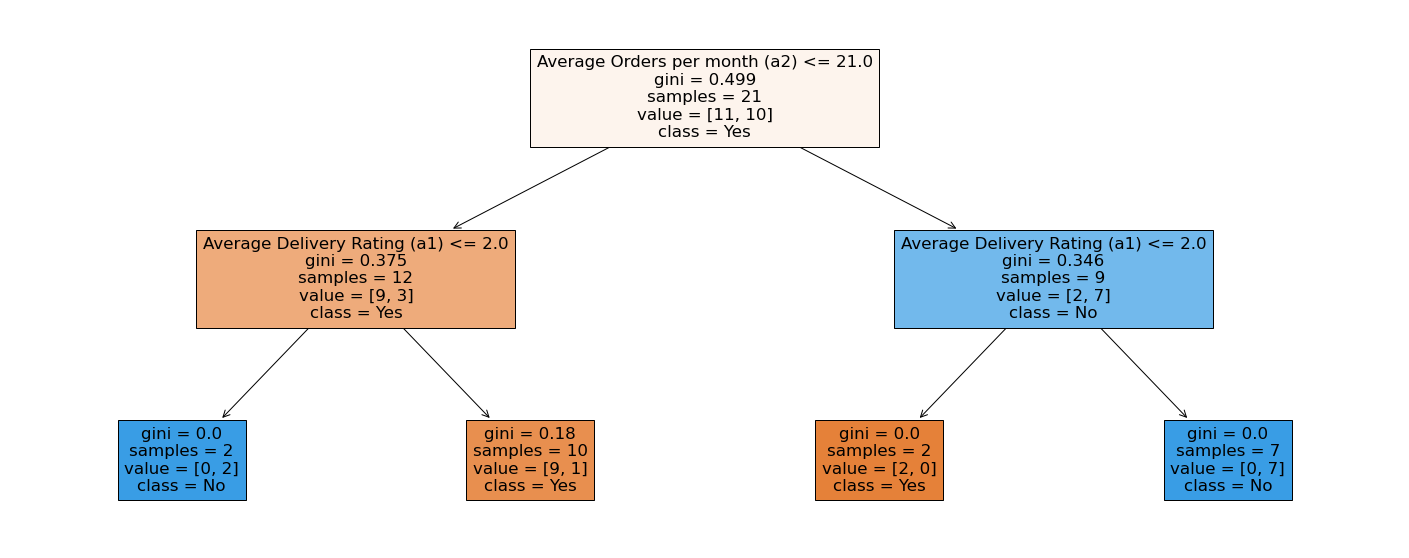

In [36]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(dt_best,
                   feature_names=X.columns,
                   class_names=['Yes', "No"],
                   filled=True)

In [37]:
evaluate_model(dt_best)

Train Accuracy : 0.95
Train Confusion Matrix:
[[11  0]
 [ 1  9]]
--------------------------------------------------
Test Accuracy : 0.89
Test Confusion Matrix:
[[4 0]
 [1 4]]


In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

          No       0.80      1.00      0.89         4
         Yes       1.00      0.80      0.89         5

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



In [40]:
print(classification_report(y_train, dt_best.predict(X_train)))

              precision    recall  f1-score   support

          No       0.92      1.00      0.96        11
         Yes       1.00      0.90      0.95        10

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21

